In [123]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [124]:
df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\jamsydLibrary\pnl.csv',parse_dates=True,index_col='time')

# df['ma_1'] = df['close'].rolling(window=5).mean().diff(1).apply(lambda x: 1 if x > 0 else 0)
# df['ma_2'] = df['close'].rolling(window=6).mean().diff(1).apply(lambda x: 1 if x > 0 else 0)
# df['ma_3'] = df['close'].rolling(window=7).mean().diff(1).apply(lambda x: 1 if x > 0 else 0)
df['ma_4'] = df['close'].rolling(window=15).mean().diff(1).apply(lambda x: 1 if x > 0 else 0)


In [125]:
# Loop through the series
for i in range(len(df['0'])):
    if df['0'].iloc[i] == 1:
        # Make sure not to go out of bounds
        for j in range(1, min(5, len(df['0']) - i)):
            df.loc[df.index[i + j], '0'] = 1

# 'df' now has the next 4 values set to 1 after every 1
print(df['0'])


time
1998-12-09 14:30:00+00:00    0
1998-12-11 14:30:00+00:00    0
1998-12-15 14:30:00+00:00    1
1998-12-17 14:30:00+00:00    1
1998-12-21 14:30:00+00:00    1
                            ..
2023-01-13 14:30:00+00:00    1
2023-01-19 14:30:00+00:00    1
2023-01-20 14:30:00+00:00    1
2023-01-25 14:30:00+00:00    1
2023-01-26 14:30:00+00:00    1
Name: 0, Length: 2943, dtype: int64


In [126]:
df['final_pnl'] = df['pnl']*df['0']*df['ma_4']

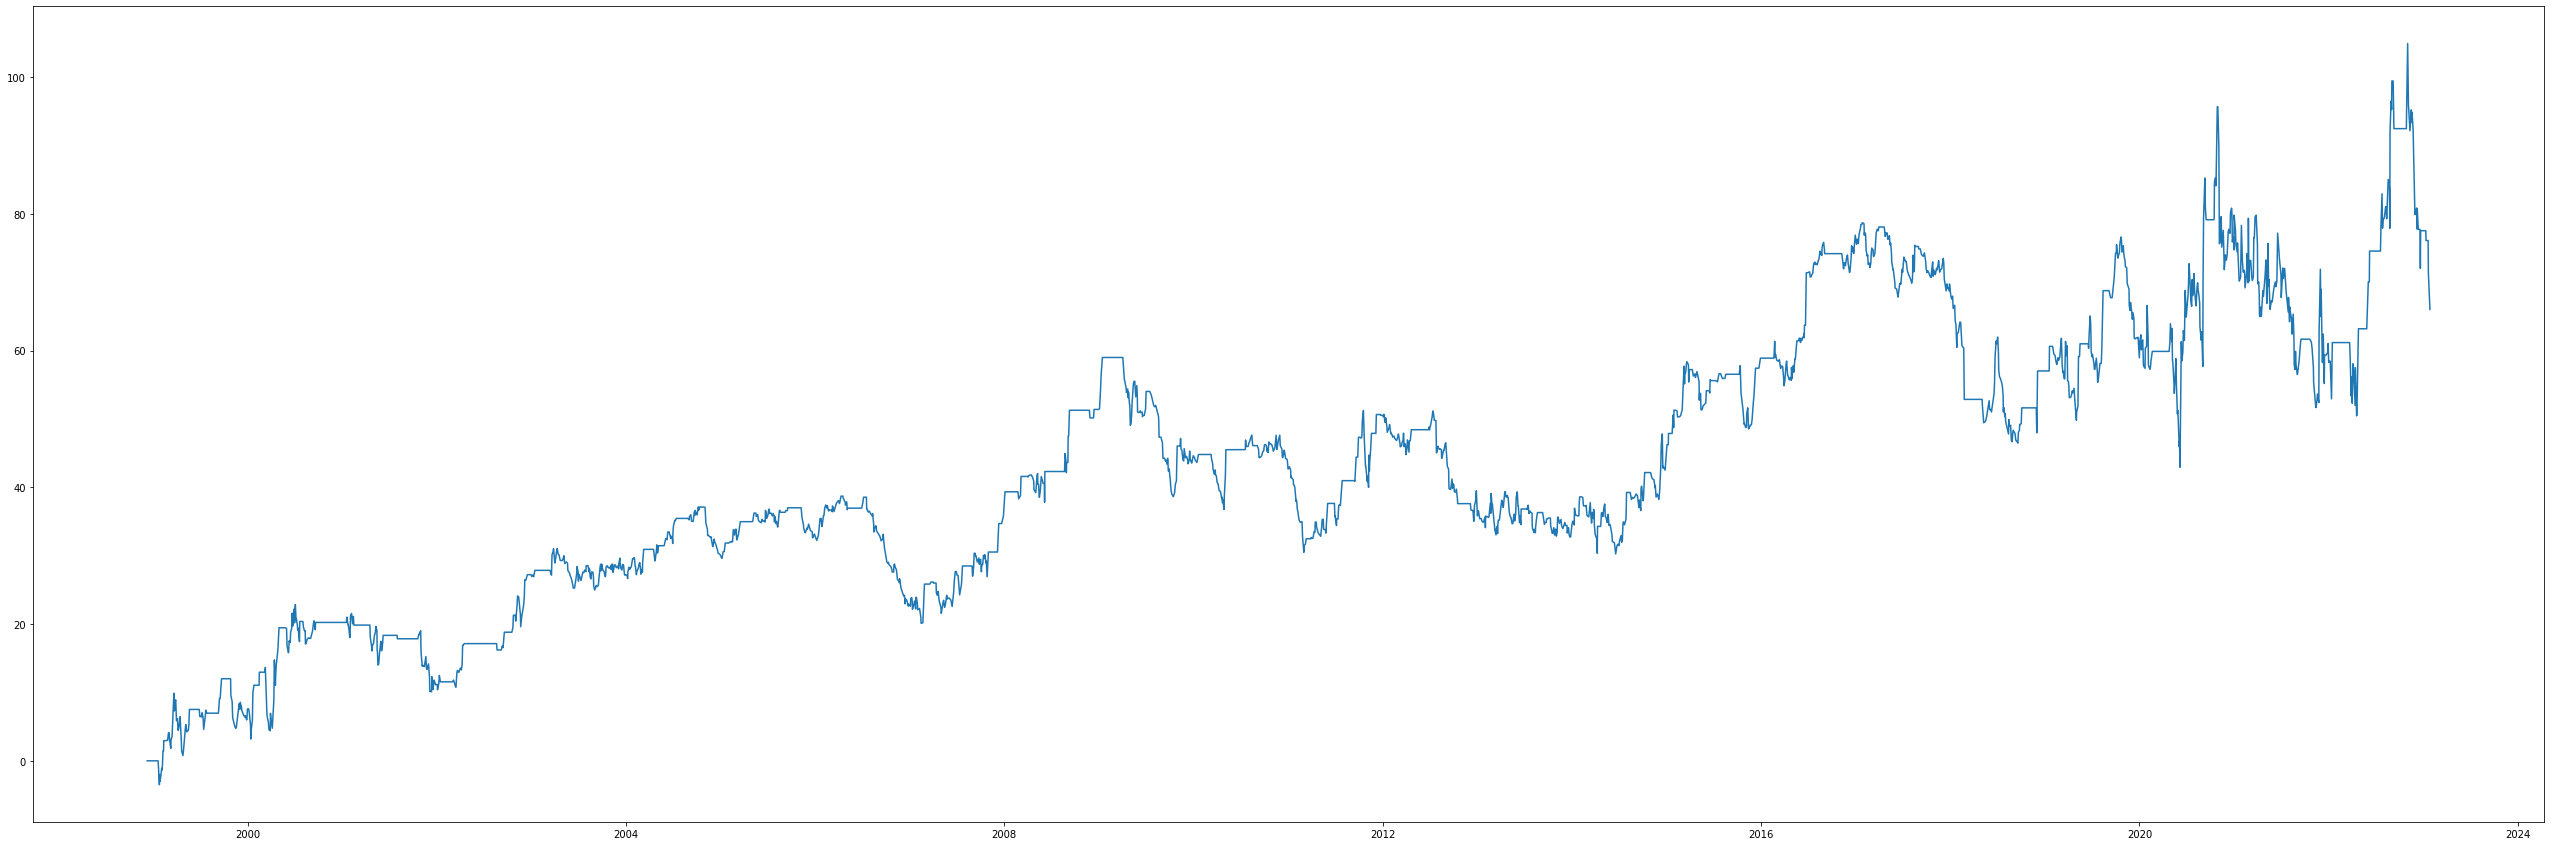

In [127]:
plt.figure(figsize=(45,15))
plt.plot(-df['final_pnl'].cumsum())